In [1]:
from sympy import *
import sympy
from sympy.solvers import solve
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipyvolume as ipv
import ipyvolume.pylab as plt3d
from pylab import *
%matplotlib inline

sympy.init_printing(pretty_print=True)

In [2]:
def prey_du_dt(u, v):
    a = 1.
    b = 0.1 
    return u * (a - b * v)

def predator_dv_dt(u, v):
    c = 1.5
    d = 0.75
    b = 0.1
    return - v * (c - d * b * u)

In [4]:
def solve_lotka_volterra():
    '''
    Initial conditions
    u(0) = 10 : size of prey population at time=0
    v(0) = 5 : size of predator population at time=0
    
    Forward Euler step
    
    Return : step size, prey population and predator population at each step size
    '''
    step_size = 40/2000
    num_of_steps = 2000
    # t = np.linspace(0,40,1000)
    t = np.zeros(num_of_steps+1)
    u = np.zeros(num_of_steps+1)
    v = np.zeros(num_of_steps+1)
    
    for i in range(num_of_steps):
        u[0] = 10
        v[0] = 5
        t[i+1] = (step_size) * (i+1)
        u[i+1] = u[i] + step_size * prey_du_dt(u[i],v[i])
        v[i+1] = v[i] + step_size * predator_dv_dt(u[i],v[i])
        
    return t,u,v

In [5]:
solve_lotka_volterra_t, solve_lotka_volterra_u, solve_lotka_volterra_v = solve_lotka_volterra()

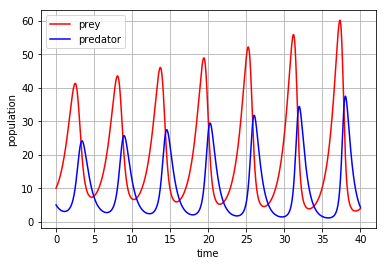

In [6]:
plt.grid()
plt.xlabel('time')
plt.ylabel('population')
plt.plot(solve_lotka_volterra_t,solve_lotka_volterra_u,color='r',label='prey')
plt.plot(solve_lotka_volterra_t,solve_lotka_volterra_v,color='b',label='predator')
plt.legend(loc='best')

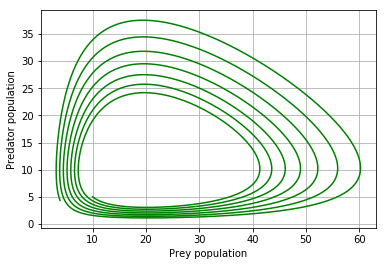

In [7]:
plt.xlabel('Prey population')
plt.ylabel('Predator population')
plt.grid()
plt.plot(solve_lotka_volterra_u,solve_lotka_volterra_v,color='g')

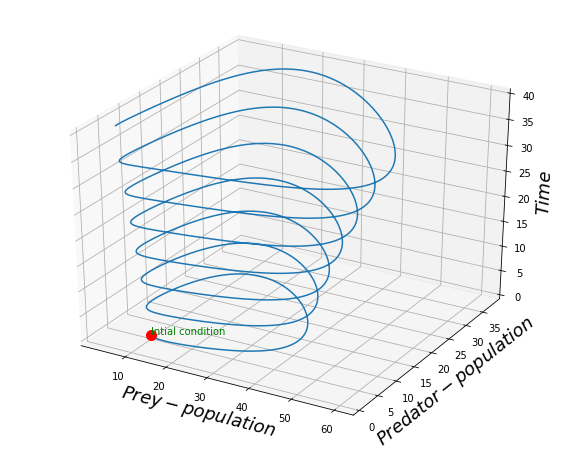

In [10]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot3D(solve_lotka_volterra_u, solve_lotka_volterra_v, solve_lotka_volterra_t)
#ax.set_title("$f(x,y)=x+y$", fontsize=18)
ax.set_xlabel("$Prey-population$", fontsize=18)
ax.set_ylabel("$Predator-population$", fontsize=18)
ax.set_zlabel("$Time$", fontsize=18)
ax.plot([10],[5],"red", marker = "o", markersize = 10.0)
ax.text(10,5,0,'Intial condition',color='g')
plt.show()

In [8]:
# Equilibria / Fixed points
u, v = sympy.symbols('u v')
a, b, c, d = sympy.symbols('a b c d')
fixed_points = sympy.solve([prey_du_dt(u,v), predator_dv_dt(u,v)], (u, v))
fixed_points

# Alternate method
# import sympy as sm
# x, y = sm.symbols('x, y', negative=False)
# Requal = sm.Eq(prey_du_dt(x,y),0)
# Cequal = sm.Eq(predator_dv_dt(x,y),0)
# equilibria = sm.solve((Requal,Cequal),x,y)
# equilibria

No handles with labels found to put in legend.


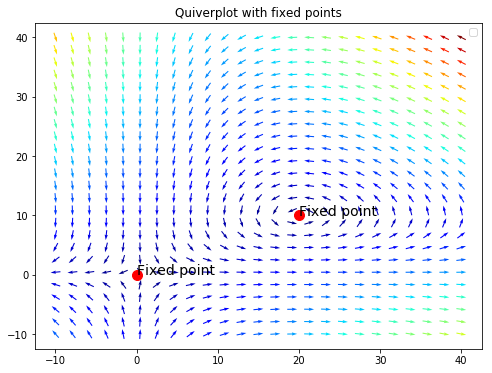

In [22]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1)

for point in fixed_points:
    ax1.plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
    ax1.text(point[0],point[1],'Fixed point',color='black', fontsize=14)
ax1.set_title("Quiverplot with fixed points")
ax1.legend(loc='best')

u = np.linspace(-10, 40, 25)
v = np.linspace(-10, 40, 25)
u, v = np.meshgrid(u, v)
du = prey_du_dt(u,v)
dv = predator_dv_dt(u,v)
M = (hypot(du, dv))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
du /= M                                        # Normalize each arrows
dv /= M
ax1.quiver(u, v, du, dv, M, pivot='mid', cmap='jet')

In [81]:
# Naming the fixed points
(u0,v0),(u1,v1) = fixed_points

In [82]:
system_of_equations = Matrix((prey_du_dt(u,v), predator_dv_dt(u,v)))
system_of_equations

⎡ u⋅(1.0 - 0.1⋅v)  ⎤
⎢                  ⎥
⎣-v⋅(1.5 - 0.075⋅u)⎦

In [86]:
jacobian_system_of_equations = system_of_equations.jacobian((u, v))
jacobian_system_of_equations

⎡1.0 - 0.1⋅v     -0.1⋅u    ⎤
⎢                          ⎥
⎣  0.075⋅v    0.075⋅u - 1.5⎦

In [87]:
M0 = jacobian_system_of_equations.subs(u, u0).subs(v, v0)
M0

⎡1.0   0  ⎤
⎢         ⎥
⎣ 0   -1.5⎦

In [85]:
M1 = jacobian_system_of_equations.subs(u, u1).subs(v, v1)
M1

⎡ 0            -2.0        ⎤
⎢                          ⎥
⎣0.75  2.22044604925031e-16⎦

In [88]:
M0.eigenvals()

In [89]:
M1.eigenvals().